## Demo of a Remote Eye project data file 

In [66]:
#import all the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math 

# Data Collection

Data is collected by a setup as shown below in one of the MCT lab for about a week:


The end product is a CSV file that contain the timestamp and the number of pulse train at a certain instance detected by the doppler microwave sensor. As usual the first we do when we got the csv file, we open with a excel to view it:

![excel capture of csv file](excel_capture.jpg "data")




##  Data Cleaning

Read in the data from the csv file skipping first row  as it is the label. 

In [67]:
df=pd.read_csv('reading2_20170807.csv',names=['name', 'time', 'node1', 'value'],skiprows=1)

#take a peek at the data

df.head()

,name,time,node1,value
0,reading,1502194093000000000,node_1,1.00
1,reading,1502194218000000000,node_1,1.00
2,reading,1502194236000000000,node_1,2.00
3,reading,1502194491000000000,node_1,3.00
4,reading,1502194751000000000,node_1,4.00


###  As there are error in the data file as shown below, some nan are produced when reading from the csv file. We had to get ride of these nan to clean up the data.
![error in the data](excel_error.jpg "error in data1")

In [68]:
#using to numeric function and remove row that cannot be converted
df=df.ix[:,['time','value']]
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')


In [69]:
# the unix timestamp is huge and probably in nano-second, after experimenting realised that the last 9 zeros need to be removed
df['time']=df['time']/1000000000
df['time']=pd.to_datetime(df['time'],unit='s')
df.head()

,time,value
0,2017-08-08 12:08:13,1
1,2017-08-08 12:10:18,1
2,2017-08-08 12:10:36,2
3,2017-08-08 12:14:51,3
4,2017-08-08 12:19:11,4


# Data Transformation and Visualization

We need to add two more column to make our analysis easie. They are the week of the day (0 for monday and 6 for sunday) and also to group all time to only the hour.

In [70]:
#df['time']=df['time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Singapore')
df['day_of_week'] = df['time'].dt.weekday
df['hour']=df['time'].dt.hour

df.head()

,time,value,day_of_week,hour
0,2017-08-08 12:08:13,1,1,12
1,2017-08-08 12:10:18,1,1,12
2,2017-08-08 12:10:36,2,1,12
3,2017-08-08 12:14:51,3,1,12
4,2017-08-08 12:19:11,4,1,12


### Let's plot a scatter plot of week of the day vs number of pulse to make sense of the data

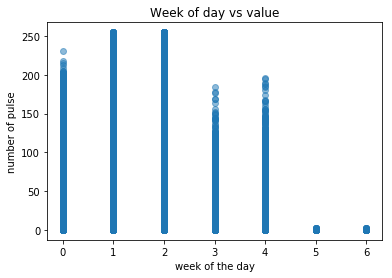

In [71]:
#scatter plot of week of the day vs number of pulse
fig1, ax1 = plt.subplots()
ax1.scatter(df['day_of_week'], df['value'], alpha=0.5)
ax1.set_title("Week of day vs value")
ax1.set_xlabel('week of the day')
ax1.set_ylabel('number of pulse')
plt.show()

### The only conclusion we could get out of the graph is that there is no pulse detected on satursay and sunday. This is comforting as we expect no one to be in the lab during weekend and the data show that the sensor is probably working properly.

### We got to further transform the data to group by hour interval such as 0:00, 1:00 and so on and compute the mean number of pulse detected within the interval.

In [72]:
grouped=df.groupby(['day_of_week','hour']).mean()
print(grouped)

                      value
day_of_week hour           
0           0     50.864979
            1     33.483122
            2     47.890295
            3     45.263713
            4     32.559072
            5     42.683544
            6     74.761603
            7     48.075949
            8     52.902954
            9     18.976793
            10    10.396624
            11    13.415612
            12    11.727848
            13     0.042105
            14     0.004228
            15     0.018947
            16     0.002114
            17     0.033613
            18     0.006342
            19     0.021097
            20     0.002110
            21     0.027426
            22     0.002110
            23     0.780591
1           0     25.721519
            1     39.694737
            2     36.472574
            3     39.675105
            4     23.018987
            5     28.442105
...                     ...
5           18     0.010571
            19     0.025263
            20     0

### inspection of th data tell us something very troubling. There is quite a high mean number of pulse during mid-night which is pretty puzzling. As it turn out, this due to time-zone and there is a need to convert the datetime to Singapore timezone.

In [73]:
# we had to go all the way back to redo some of the conversion
df=pd.read_csv('reading2_20170807.csv',names=['name', 'time', 'node1', 'value'],skiprows=1)
#using to numeric function and remove row that cannot be converted
df=df.ix[:,['time','value']]
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

df['time']=df['time']/1000000000
df['time']=pd.to_datetime(df['time'],unit='s')
df['time']=df['time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Singapore') # correction of time zone
df['day_of_week'] = df['time'].dt.weekday
df['hour']=df['time'].dt.hour
grouped=df.groupby(['day_of_week','hour']).mean()
print(grouped)

                      value
day_of_week hour           
0           0      0.021097
            1      0.023207
            2      0.016878
            3      0.010549
            4      0.023207
            5      0.014799
            6      0.029474
            7      0.006329
            8     50.864979
            9     33.483122
            10    47.890295
            11    45.263713
            12    32.559072
            13    42.683544
            14    74.761603
            15    48.075949
            16    52.902954
            17    18.976793
            18    10.396624
            19    13.415612
            20    11.727848
            21     0.042105
            22     0.004228
            23     0.018947
1           0      0.002114
            1      0.033613
            2      0.006342
            3      0.021097
            4      0.002110
            5      0.027426
...                     ...
5           18     0.016878
            19     0.035865
            20     0

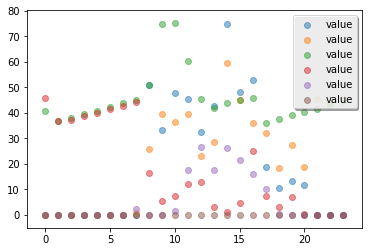

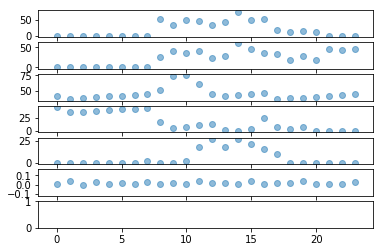

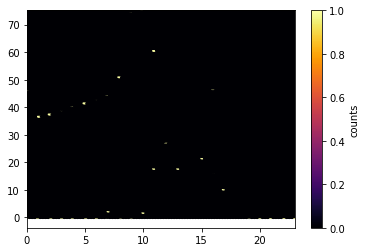

In [74]:
fig, (ax1) = plt.subplots(nrows = 1, sharex = True)
for i in range(0,6,1):
  #ax1.plot(grouped.loc[i], marker=u'+')
  temp= grouped.loc[i]
  ax1.scatter(range(0,24,1),temp['value'].T,alpha=0.5)
legend = ax1.legend(loc='upper right', shadow=True)
fig2, am = plt.subplots(nrows = 7, sharex = True)
for i in range(0,6,1):
  temp= grouped.loc[i]
  am[i].scatter(range(0,24,1),temp['value'].T,alpha=0.5)
fig3, at = plt.subplots(nrows = 1, sharex = True)
for i in range(0,6,1):
  temp= grouped.loc[i]
  hb=at.hexbin(range(0,24,1),temp['value'].T,cmap='inferno')

cb = fig3.colorbar(hb, ax=at)

cb.set_label('counts')
plt.show()